In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import ttest_ind, chi2_contingency

data = pd.read_csv('alzheimers_prediction_dataset.csv')

In [2]:
numerical_cols = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
categorical_cols = [col for col in data.columns if col not in numerical_cols and col != 'Alzheimer Diagnosis']

In [3]:
print("Descriptive Statistics for Numerical Columns:")
print(data[numerical_cols].describe())

print("\nFrequency Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:\n{data[col].value_counts()}")

Descriptive Statistics for Numerical Columns:
                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000

Frequency Counts for Categorical Columns:

Country:
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France       

In [4]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Ur


Correlation Matrix:
                           Age  Education Level       BMI  \
Age                   1.000000         0.006511 -0.000135   
Education Level       0.006511         1.000000  0.005444   
BMI                  -0.000135         0.005444  1.000000   
Cognitive Test Score  0.000049        -0.002519  0.005538   

                      Cognitive Test Score  
Age                               0.000049  
Education Level                  -0.002519  
BMI                               0.005538  
Cognitive Test Score              1.000000  


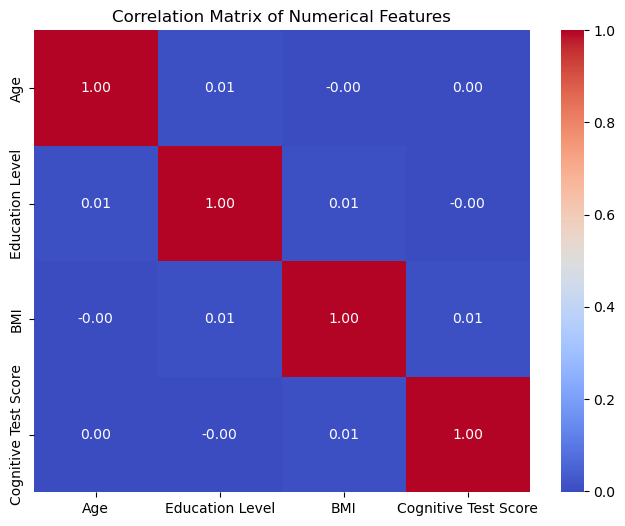

In [5]:
corr_matrix = data[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

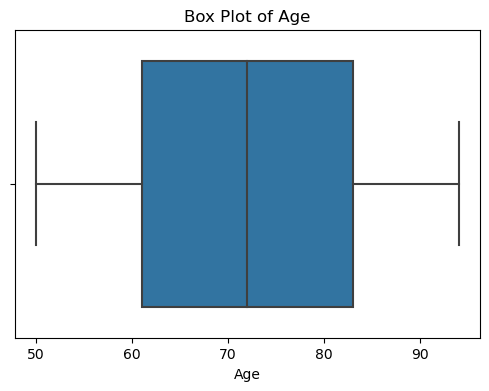

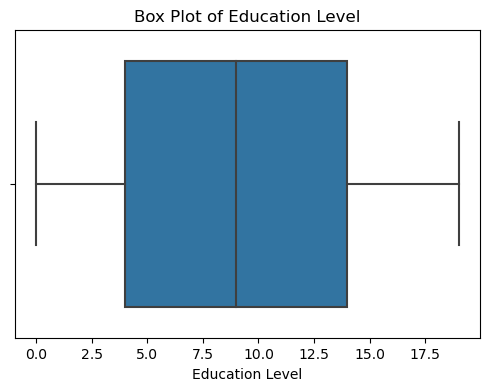

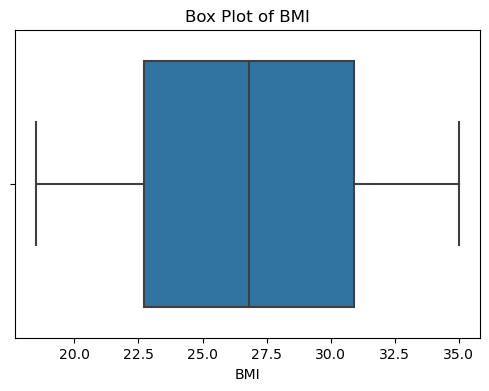

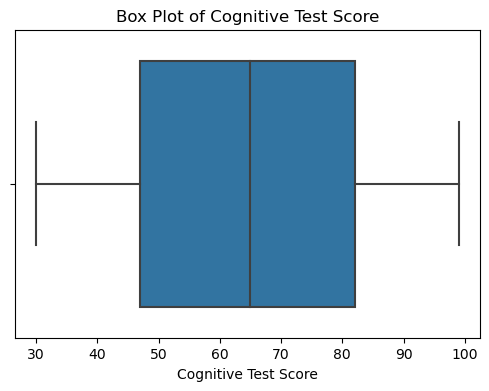

In [6]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

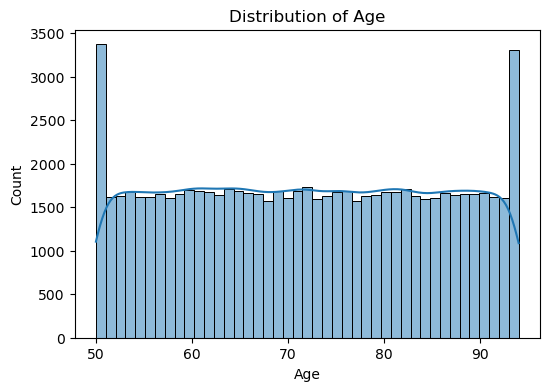

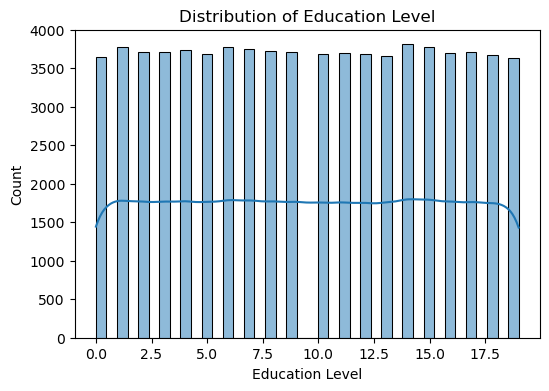

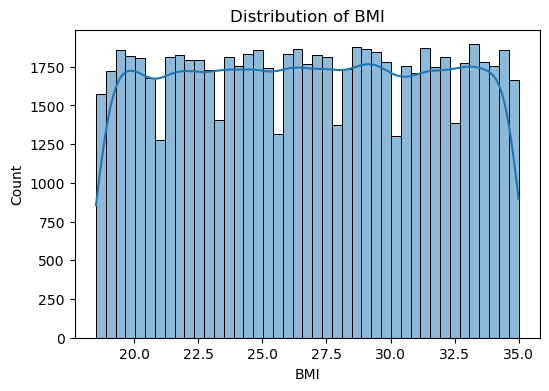

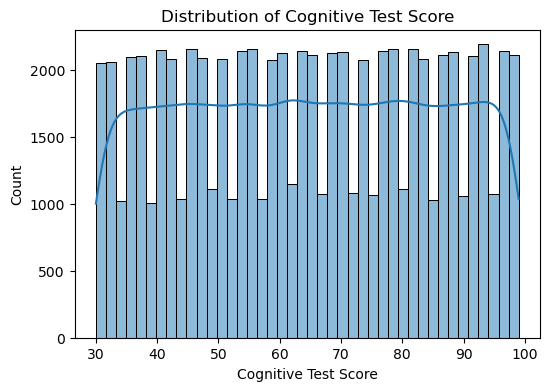

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

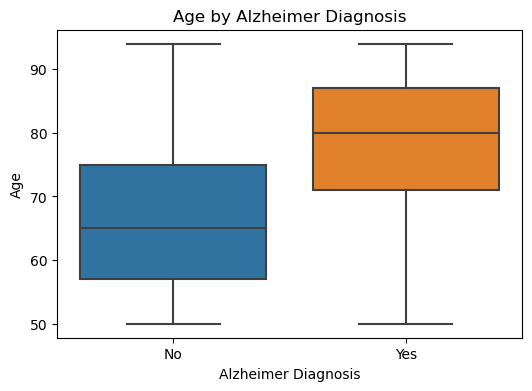

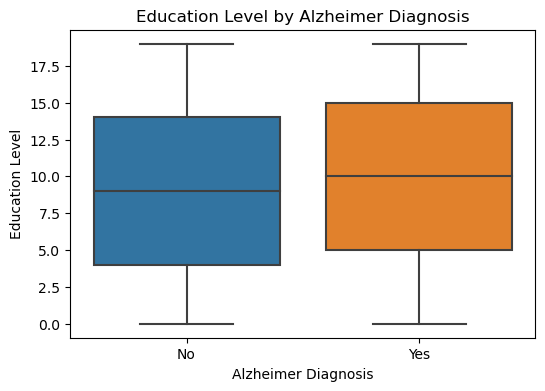

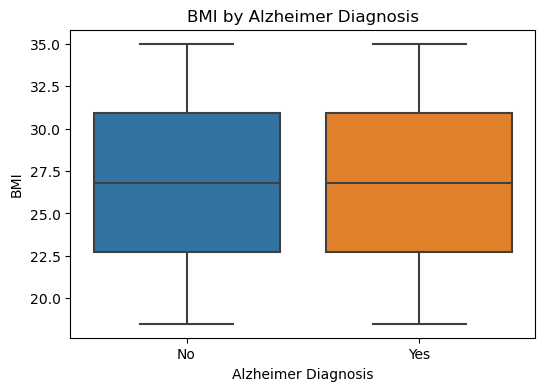

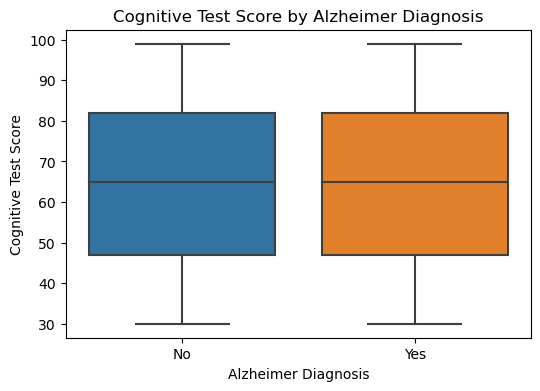

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Alzheimer Diagnosis', y=col, data=data)
    plt.title(f'{col} by Alzheimer Diagnosis')
    plt.show()

In [9]:
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
X = data.drop('Alzheimer Diagnosis', axis=1)
y = data['Alzheimer Diagnosis'].map({'No': 0, 'Yes': 1})

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [11]:
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.3, random_state=777)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=777),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


Logistic Regression Performance:
Accuracy: 0.7149
Precision: 0.6748
Recall: 0.6045
F1-Score: 0.6377
ROC-AUC: 0.7896

Random Forest Performance:
Accuracy: 0.7177
Precision: 0.6722
Recall: 0.6246
F1-Score: 0.6475
ROC-AUC: 0.7924

KNN Performance:
Accuracy: 0.6215
Precision: 0.5568
Recall: 0.4332
F1-Score: 0.4873
ROC-AUC: 0.6341


In [14]:
print("\nT-Test Results for Numerical Features:")
for col in numerical_cols:
    group0 = data[data['Alzheimer Diagnosis'] == 'No'][col]
    group1 = data[data['Alzheimer Diagnosis'] == 'Yes'][col]
    t_stat, p_value = ttest_ind(group0, group1)
    print(f"{col}: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")


T-Test Results for Numerical Features:
Age: t-statistic=-126.1052, p-value=0.0000
Education Level: t-statistic=-1.0172, p-value=0.3091
BMI: t-statistic=0.4640, p-value=0.6426
Cognitive Test Score: t-statistic=0.3112, p-value=0.7557


In [15]:
print("\nChi-Square Test Results for Categorical Features:")
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Alzheimer Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.4f}, p-value={p:.4f}")


Chi-Square Test Results for Categorical Features:
Country: chi2=856.4996, p-value=0.0000
Gender: chi2=0.1327, p-value=0.7156
Physical Activity Level: chi2=0.7115, p-value=0.7007
Smoking Status: chi2=1.1304, p-value=0.5682
Alcohol Consumption: chi2=2.5333, p-value=0.2818
Diabetes: chi2=0.5170, p-value=0.4721
Hypertension: chi2=0.0979, p-value=0.7544
Cholesterol Level: chi2=0.3195, p-value=0.5719
Family History of Alzheimer’s: chi2=1473.7796, p-value=0.0000
Depression Level: chi2=0.5819, p-value=0.7476
Sleep Quality: chi2=0.0936, p-value=0.9543
Dietary Habits: chi2=1.5262, p-value=0.4662
Air Pollution Exposure: chi2=1.5527, p-value=0.4601
Employment Status: chi2=2.5743, p-value=0.2761
Marital Status: chi2=0.1829, p-value=0.9126
Genetic Risk Factor (APOE-ε4 allele): chi2=2808.6966, p-value=0.0000
Social Engagement Level: chi2=0.7582, p-value=0.6845
Income Level: chi2=3.5998, p-value=0.1653
Stress Levels: chi2=2.0418, p-value=0.3603
Urban vs Rural Living: chi2=1.2348, p-value=0.2665


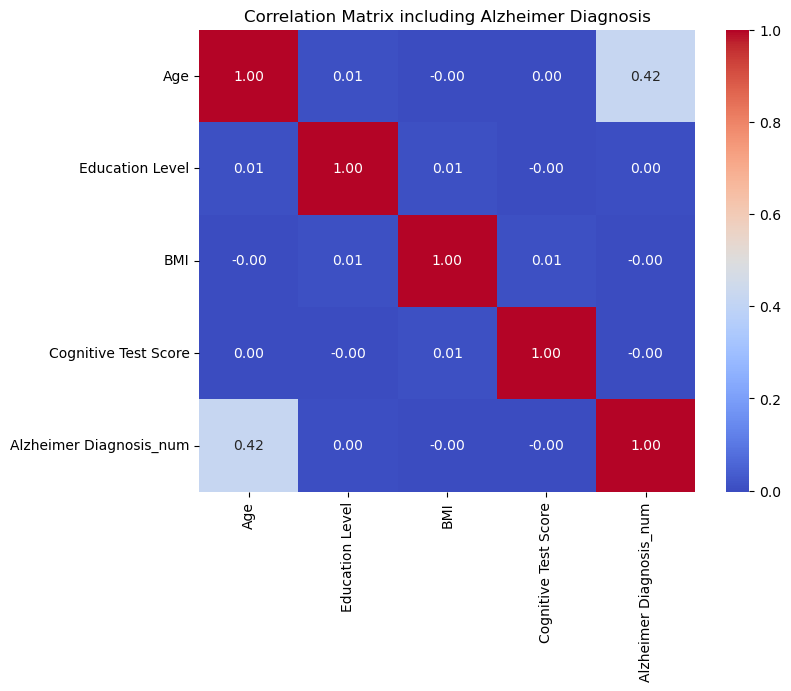

In [20]:
data['Alzheimer Diagnosis_num'] = data['Alzheimer Diagnosis'].map({'No': 0, 'Yes': 1})
corr_matrix = data[numerical_cols + ['Alzheimer Diagnosis_num']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix including Alzheimer Diagnosis')
plt.show()

C:\Users\ASUS  N551JW\AppData\Local\Temp\ipykernel_6320\3404304204.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


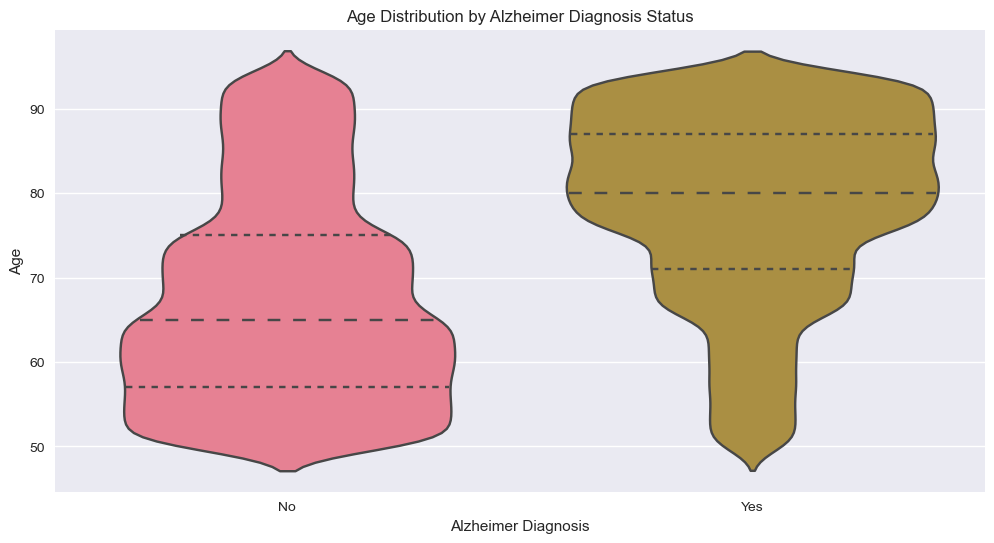

In [22]:
plt.style.use('seaborn')
sns.set_palette("husl")
df = pd.read_csv('alzheimers_prediction_dataset.csv')

# 1. Age Distribution by Diagnosis
plt.figure(figsize=(12, 6))
sns.violinplot(x='Alzheimer Diagnosis', y='Age', data=df, inner='quartile')
plt.title('Age Distribution by Alzheimer Diagnosis Status')
plt.xlabel('Alzheimer Diagnosis')
plt.ylabel('Age')
plt.show()

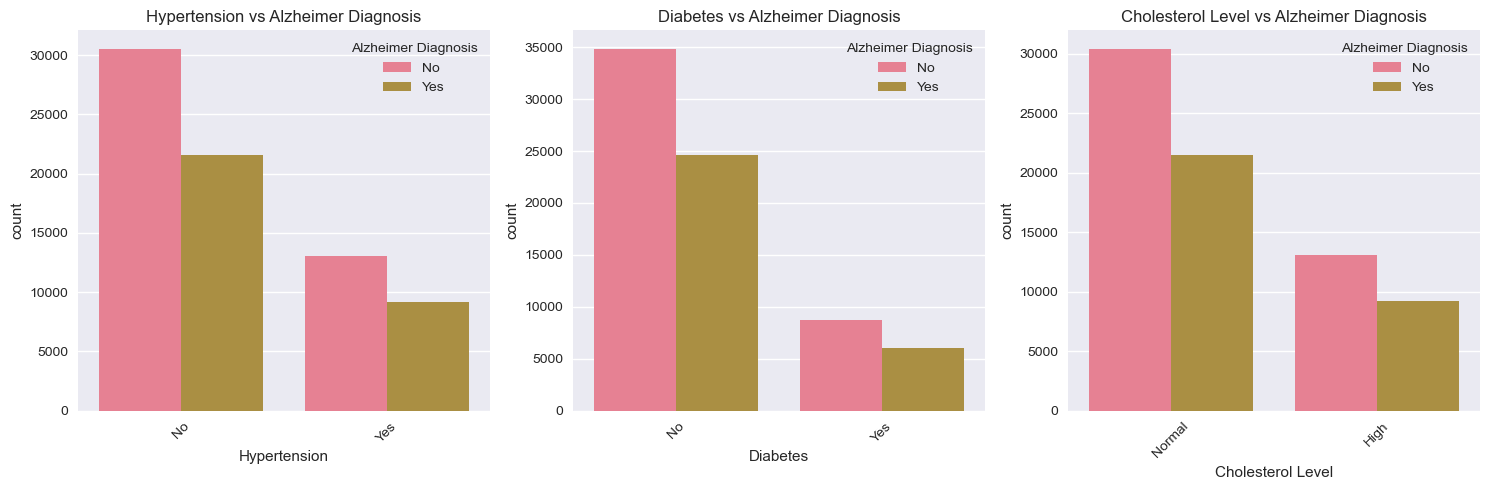

In [26]:
comorbid_conditions = ['Hypertension', 'Diabetes', 'Cholesterol Level']
plt.figure(figsize=(15, 5))
for i, condition in enumerate(comorbid_conditions, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=condition, hue='Alzheimer Diagnosis', data=df)
    plt.title(f'{condition} vs Alzheimer Diagnosis')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers.count()

In [34]:
print("\nOutlier Detection:")
for col in numerical_cols:
    outlier_count = detect_outliers(df, col)
    print(f"{col}: {outlier_count} outliers detected")


Outlier Detection:
Age: 0 outliers detected
Education Level: 0 outliers detected
BMI: 0 outliers detected
Cognitive Test Score: 0 outliers detected


In [43]:
coll2= ['Family History of Alzheimer’s','Genetic Risk Factor (APOE-ε4 allele)']

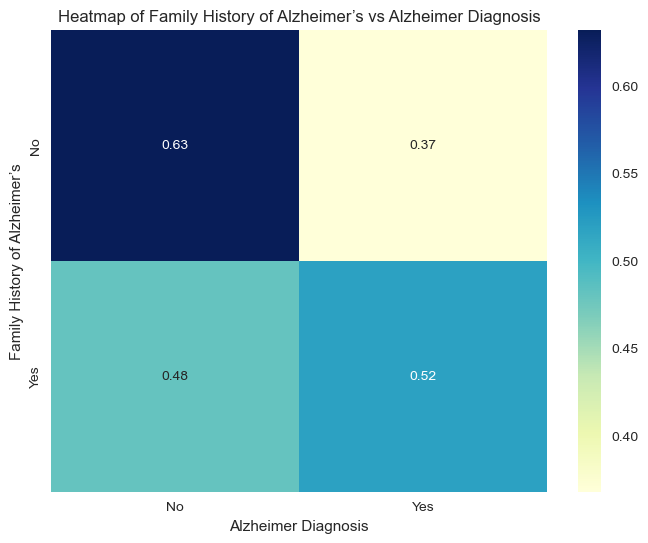

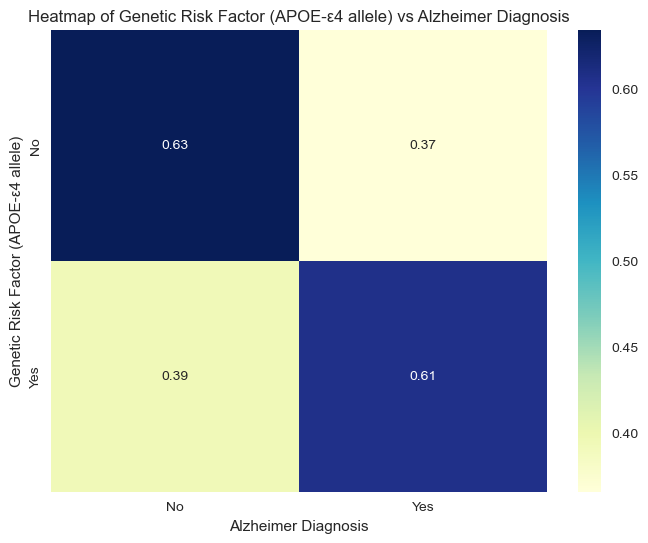

In [44]:
for col in coll2:
    plt.figure(figsize=(8, 6))
    crosstab = pd.crosstab(data[col], data['Alzheimer Diagnosis'], normalize='index')
    sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Heatmap of {col} vs Alzheimer Diagnosis')
    plt.ylabel(col)
    plt.xlabel('Alzheimer Diagnosis')
    plt.show()